## Semantic search and enriched embeddings

### Semantic search
- Use embeddings to return most similar results to a search query
- Example: Semantic search for online news website

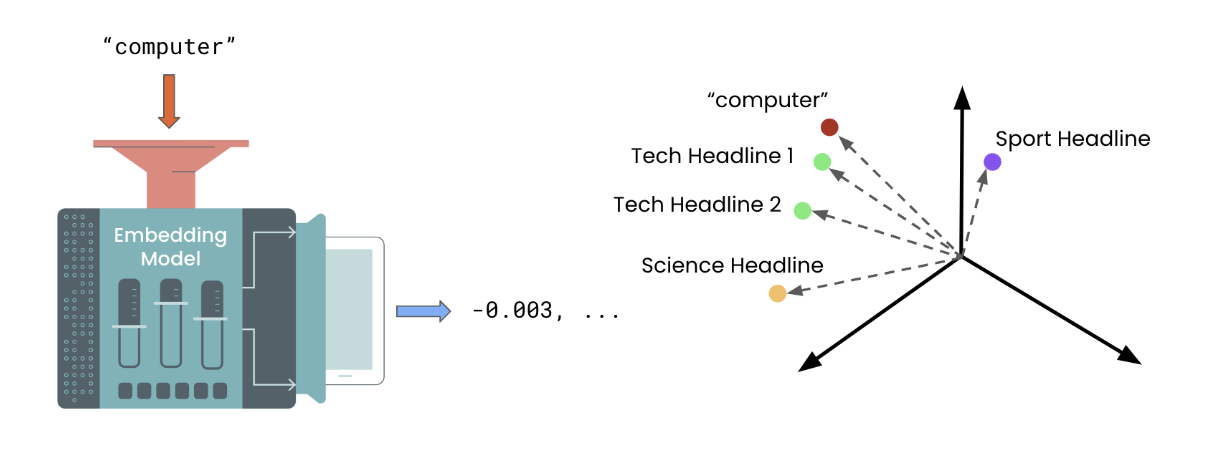

1. **Embed** the search query and other texts
2. Compute the **cosine distances**
3. **Extract** the texts with the *smallest* cosine distance

### Enriched embeddings
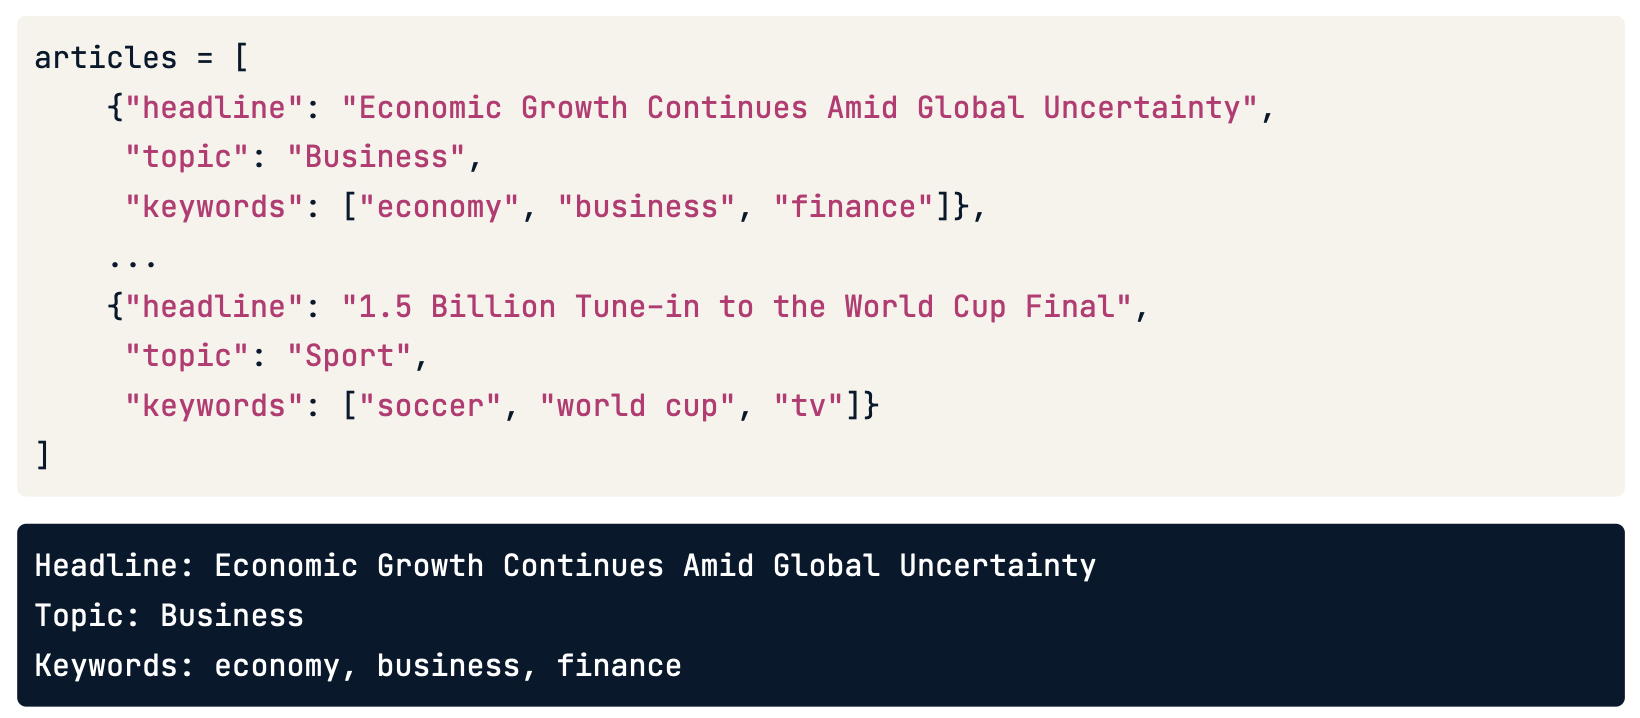

### Combining features with F-strings

In [ ]:
articles = [..., {"headline": "1.5 Billion Tune-in to the World Cup ",
                  "topic": "Sport",
                  "keywords": ["soccer", "world cup", "tv"]
                 }]
def create_article_text(article):
    return f"""Headline: {article['headline']}
    Topic: {article['topic']}
    Keywords: {', '.join(article['keywords'])}"""
    
print(create_article_text(articles[-1]))

### Output:
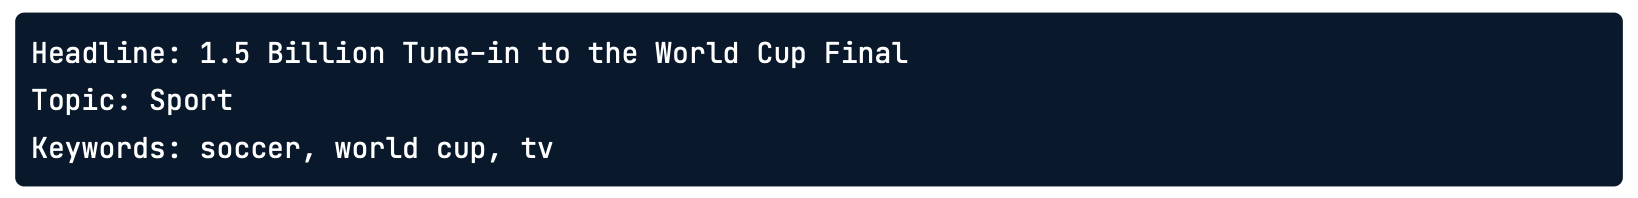

### Creating enriched embeddings

In [ ]:
article_texts = [create_article_text(article) for article in articles]

article_embeddings = create_embeddings(article_texts)
print(article_embeddings)

### Output:
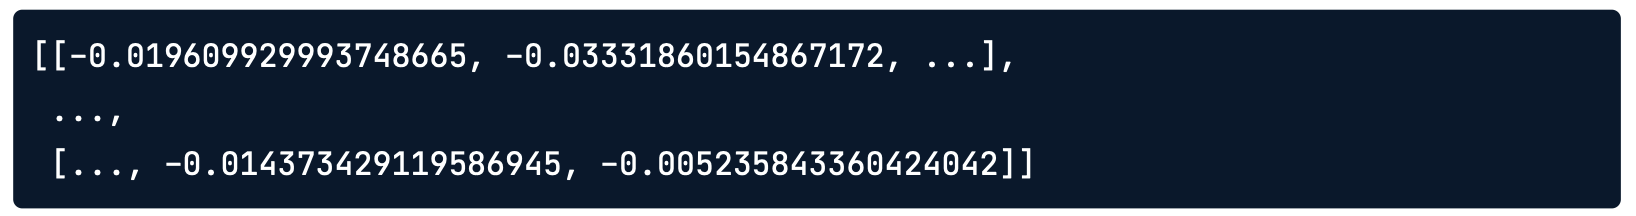

### Computing distances

In [ ]:
from scipy.spatial import distance

def find_n_closest(query_vector, embeddings, n=3): 
    distances = []
    for index, embedding inenumerate(embeddings):  
        dist = distance.cosine(query_vector, embedding)   
        distances.append({"distance": dist, "index": index})  
    distances_sorted = sorted(distances, key=lambda x: x["distance"])
    return distances_sorted[0:n]

In [ ]:
# Returning the search results

query_text = "AI"
query_vector = create_embeddings(query_text)[0]

hits = find_n_closest(query_vector, article_embeddings)

for hit in hits:  
    article = articles[hit['index']]
    print(article['headline'])

### Output:
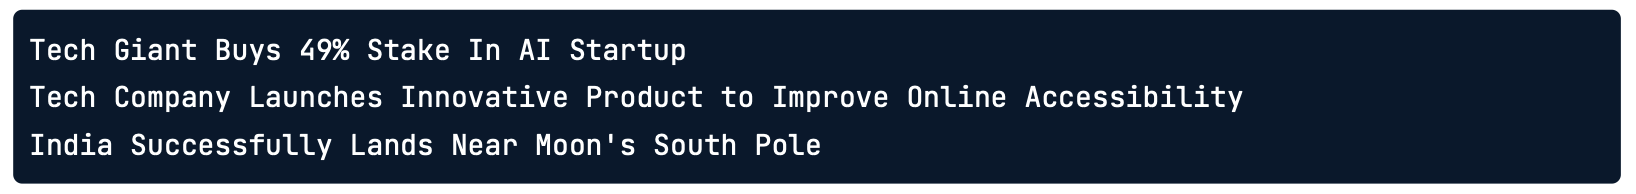

In [ ]:
# Practice 1

# Define a function to combine the relevant features into a single string
def create_product_text(product):
    return f"""Title: {product['title']}
Description: {product['short_description']}
Category: {product['category']}
Features: {'; '.join(product['features'])}"""

# Combine the features for each product
product_texts = [create_product_text(product) for product in products]

# Create the embeddings from product_texts
product_embeddings = create_embeddings(product_texts)

In [ ]:
# Practice 2

def find_n_closest(query_vector, embeddings, n=3):
  distances = []
  for index, embedding in enumerate(embeddings):
    # Calculate the cosine distance between the query vector and embedding
    dist = distance.cosine(query_vector, embedding)
    # Append the distance and index to distances
    distances.append({"distance": dist, "index": index})
  # Sort distances by the distance key
  distances_sorted = sorted(distances, key=lambda x: x["distance"])
  # Return the first n elements in distances_sorted
  return distances_sorted[0:n]

In [ ]:
# Practice 3

# Create the query vector from query_text
query_text = "computer"
query_vector = create_embeddings(query_text)[0]

# Find the five closest distances
hits = find_n_closest(query_vector, product_embeddings, n=5)

print(f'Search results for "{query_text}"')
for hit in hits:
  # Extract the product at each index in hits
  product = products[hit['index']]
  print(product["title"])

## Recommendation Systems

### Recommendation systems with embeddings
1. Embed the potential recommendations and data point
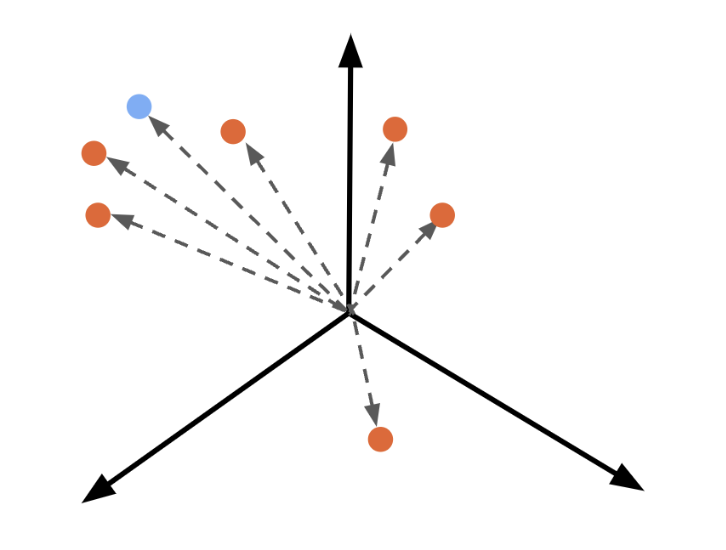

2. Calculate cosine distances
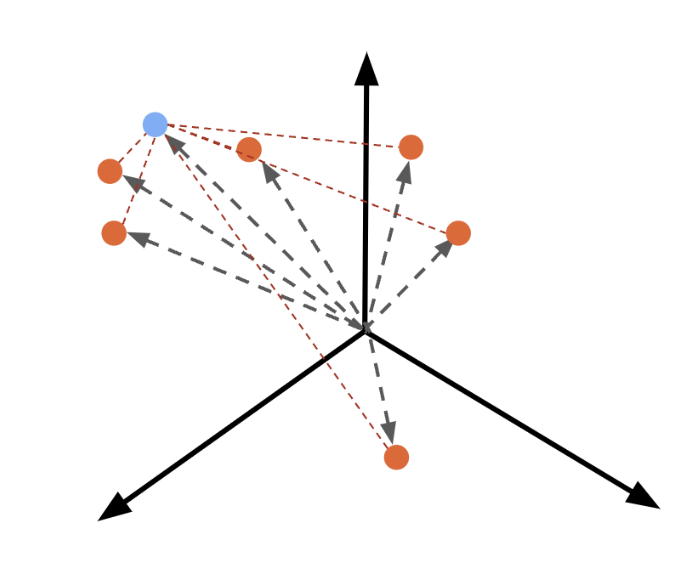

3. Recommend closest items
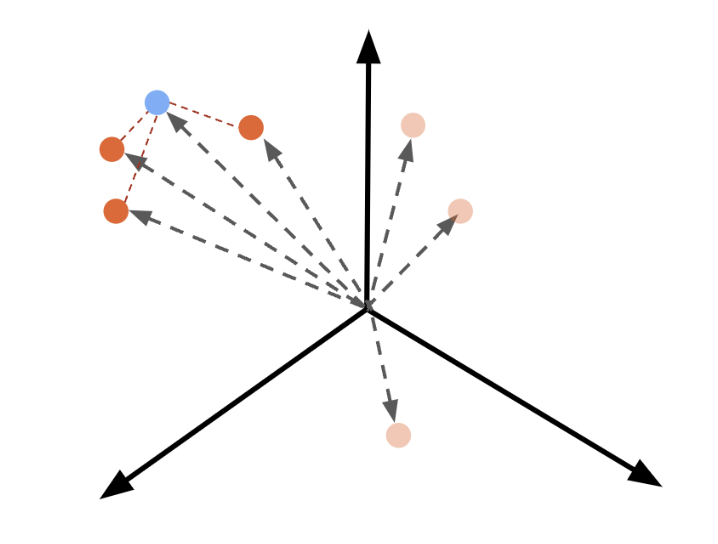

### Example: Recommended articles

In [ ]:
articles = [   
    {"headline": "Economic Growth Continues Amid Global Uncertainty",
     "topic": "Business",
     "keywords": ["economy", "business", "finance"]},    
    ...    
    {"headline": "1.5 Billion Tune-in to the World Cup Final",
     "topic": "Sport",
     "keywords": ["soccer", "world cup", "tv"]}
]

current_article = {"headline": "How NVIDIA GPUs Could Decide Who Wins the AI Race",
                   "topic": "Tech",
                   "keywords": ["ai", "business", "computers"]}

### Combining features

In [ ]:
def create_article_text(article):
    return f"""Headline: {article['headline']}
    Topic: {article['topic']}
    Keywords: {', '.join(article['keywords'])}"""

In [ ]:
article_texts = [create_article_text(article) for article in articles]
current_article_text = create_article_text(current_article)
print(current_article_text)

Output:
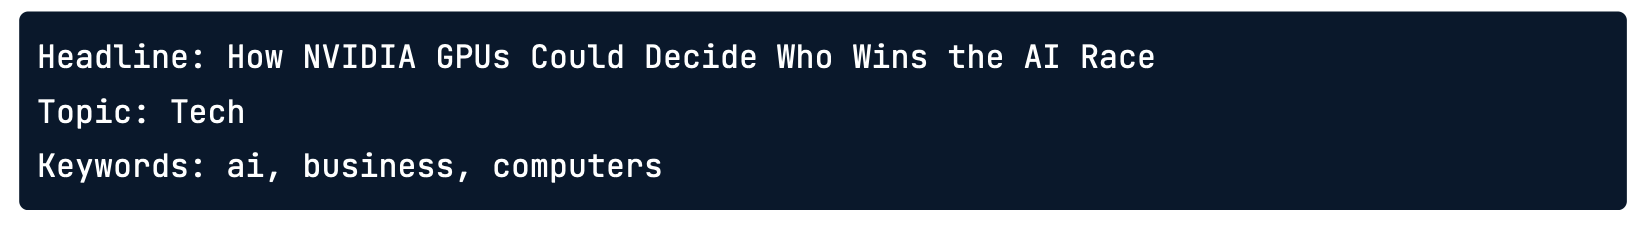

### Creating Embeddings

In [ ]:
def create_embeddings(texts): 
    response = openai.Embedding.create(    
        model="text-embedding-3-small",
        input=texts 
    ) 
    response_dict = response.model_dump()
    
    return [data['embedding'] for data in response_dict['data']]

In [ ]:
current_article_embeddings = create_embeddings(current_article_text)[0]
article_embeddings = create_embeddings(article_texts)

### Finding the most similar article

In [ ]:
def find_n_closest(query_vector, embeddings, n=3): 
    distances = []
    for index, embedding inenumerate(embeddings):   
        dist = spatial.distance.cosine(query_vector, embedding)   
        distances.append({"distance": dist, "index": index}) 
    distances_sorted = sorted(distances, key=lambda x: x["distance"])
    return distances_sorted[0:n]

In [ ]:
hits = find_n_closest(current_article_embeddings, article_embeddings)

for hit in hits:  
    article = articles[hit['index']]
    print(article['headline'])

Output:

Finding the most similar article
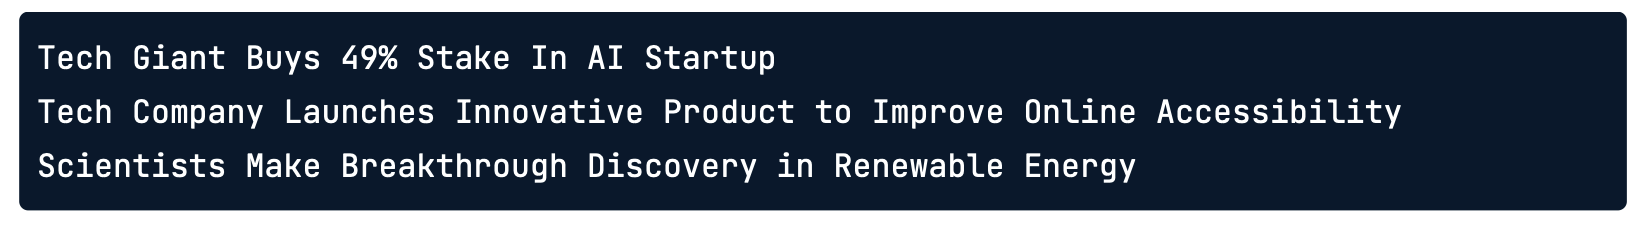

### Adding user history

In [ ]:
user_history = [  
    {"headline": "How NVIDIA GPUs Could Decide Who Wins the AI Race",
     "topic": "Tech",
     "keywords": ["ai", "business", "computers"]},   
    {"headline": "Tech Giant Buys 49% Stake In AI Startup",
     "topic": "Tech",
     "keywords": ["business", "AI"]}
]

### Recommendations on multiple data points
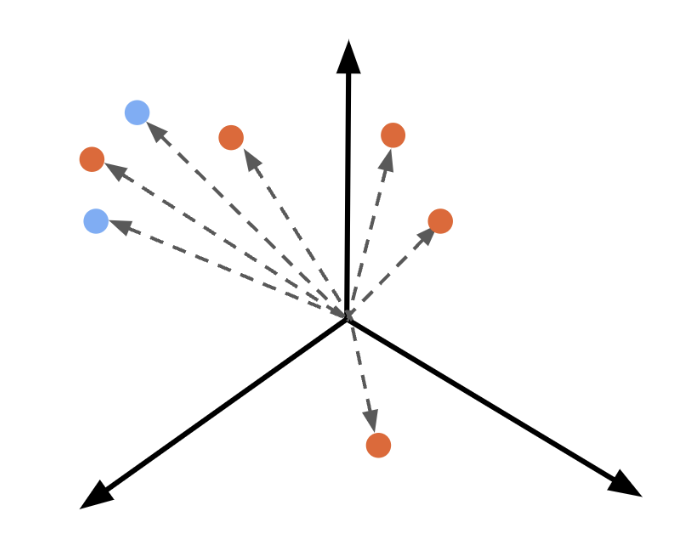

Processes:
1. Combine multiple vectors into one bytaking the **mean**
2. Compute cosine distances
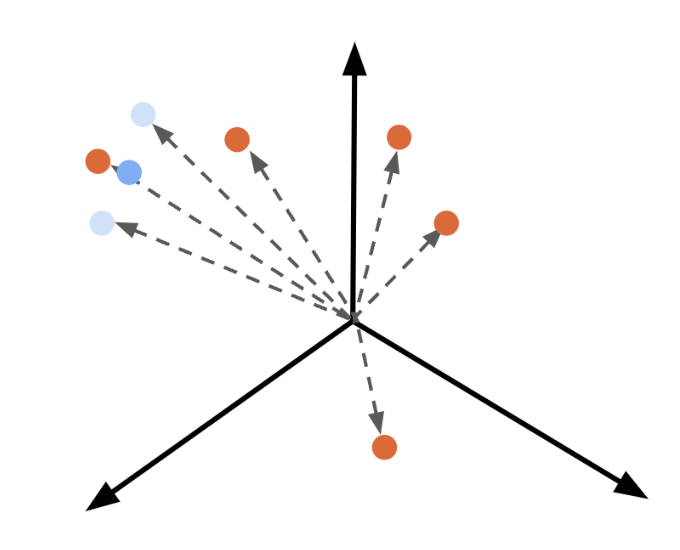

3. Recommend closest vector
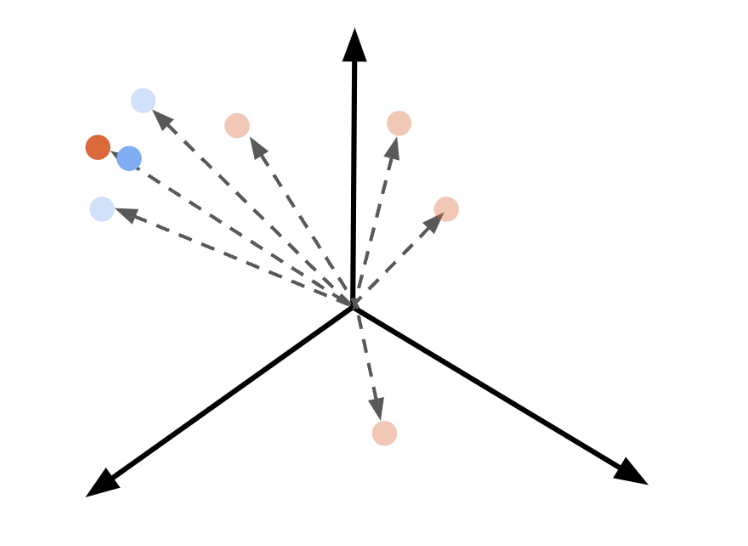

4. Ensure that its unread
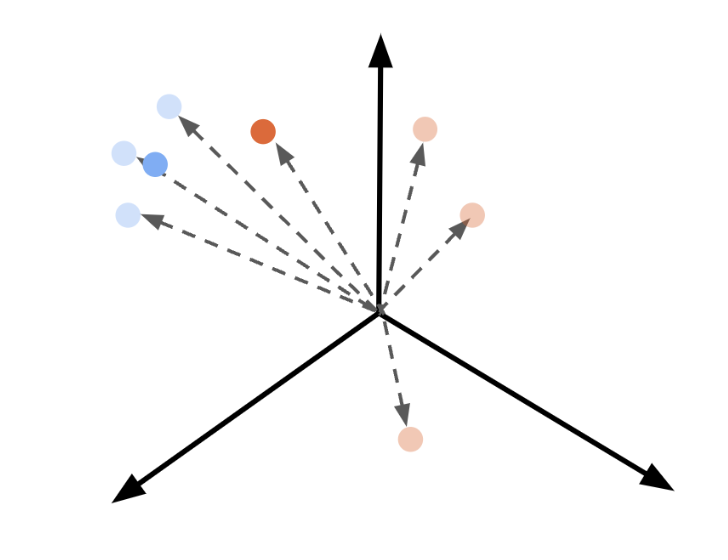

In [ ]:
def create_article_text(article):
    return f"""Headline: {article['headline']}
    Topic: {article['topic']}
    Keywords: {', '.join(article['keywords'])}"""

history_texts = [create_article_text(article) for article in user_history]
history_embeddings = create_embeddings(history_texts)
mean_history_embeddings = np.mean(history_embeddings, axis=0)

articles_filtered = [article for article in articles if article not in user_history]
article_texts = [create_article_text(article) for article in articles_filtered]
article_embeddings = create_embeddings(article_texts)

In [ ]:
hits = find_n_closest(mean_history_embeddings, article_embeddings)
for hit in hits:  
    article = articles_filtered[hit['index']]
    print(article['headline'])

Output:
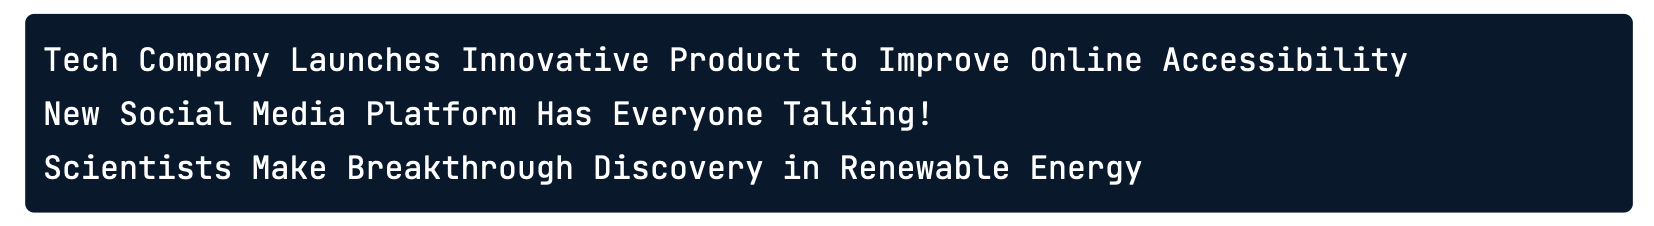

In [ ]:
# Practice 4

# Combine the features for last_product and each product in products
last_product_text = create_product_text(last_product)                 # Single product
product_texts = [create_product_text(product) for product in products]  # List of products

# Embed last_product_text and product_texts
last_product_embeddings = create_embeddings(last_product_text)[0]    # Single embedding vector
product_embeddings = create_embeddings(product_texts)                 # List of embeddings

# Find the three smallest cosine distances and their indexes
hits = find_n_closest(last_product_embeddings, product_embeddings, n=3)

for hit in hits:
    product = products[hit['index']]
    print(product['title'])

In [ ]:
# Practice 5

# Prepare and embed the user_history, and calculate the mean embeddings
history_texts = [create_product_text(article) for article in user_history]
history_embeddings = create_embeddings(history_texts)
mean_history_embeddings = np.mean(history_embeddings, axis=0)

# Filter products to remove any in user_history
products_filtered = [product for product in products if product not in user_history]

# Combine product features and embed the resulting texts
product_texts = [create_product_text(product) for product in products_filtered]
product_embeddings = create_embeddings(product_texts)

# Find the closest products to the user's mean embedding
hits = find_n_closest(mean_history_embeddings, product_embeddings)

for hit in hits:
    product = products_filtered[hit['index']]
    print(product['title'])

## Embeddings for Classification Tasks

### Classification tasks
Assigning labels to items
1. **Categorization**
   - Example: headlines into topics
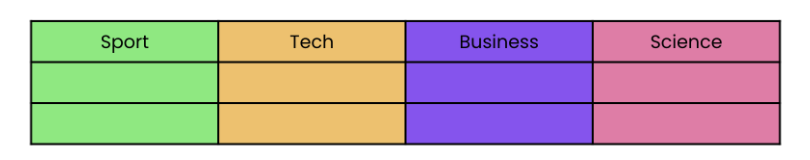

2. **Sentiment Analysis**
   - Example: Classifying reviews as positiveor negative
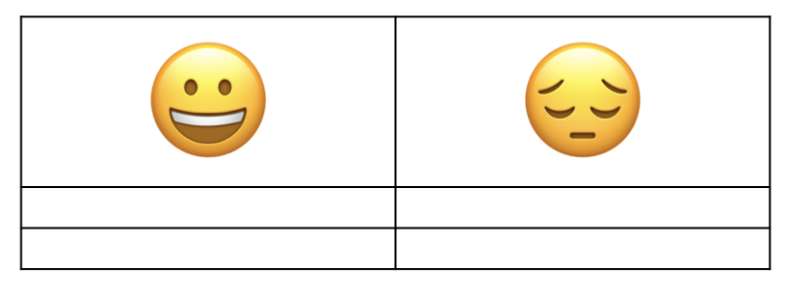

**Embeddings** capture *semantic* meaning